<a href="https://colab.research.google.com/github/tass-ouaer/London_houses/blob/main/Houses_London.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction with Linear Regression**

I am going to analyze the factors that affect the Prices of houses in London and predict the price based on input features.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.api import OLS, add_constant

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/workshop/london_houses.csv')

Mounted at /content/drive


In [2]:
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


## **Data Context**

**Columns**:

* Address: The address of the house.

* Neighborhood: The neighborhood or district where the house is located.

* Bedrooms: The number of bedrooms in the house.

* Bathrooms: The number of bathrooms in the house.

* Square Meters: The total size of the house in square meters.

* Building Age: The age of the building, indicating how long ago it was constructed.

* Garden: Indicates whether the house has a garden ("Yes" or "No").

* Garage: Indicates whether the house has a garage ("Yes" or "No").

* Floors: The total number of floors in the house.

* Property Type: The type of property, such as "Apartment" or "House."

* Heating Type: The type of heating system used in the house (e.g., "Central Heating," "Gas").

* Balcony: Indicates whether the house has a balcony ("Yes" or "No").

* Interior Style: The interior design style of the house (e.g., "Modern," "Contemporary").

* View: The type of view from the house (e.g., "City View," "Sea View").

* Materials: The materials used in the construction of the house (e.g., "Brick," "Wood").

* Building Status: The current condition of the building (e.g., "New," "Renovated," "Old").

* Price (£): The sale price of the house, in British pounds (£).

## **First Look at the data**

In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(11)
memory usa

In [4]:
# Check for null values
df.isnull().sum().sort_values(ascending=False)

,0
Address,0
Property Type,0
Building Status,0
Materials,0
View,0
Interior Style,0
Balcony,0
Heating Type,0
Floors,0
Neighborhood,0


In [5]:
# Strip any leading or trailing spaces/tabs from column names
df.columns = df.columns.str.strip()

# Rename the column Price
df.rename(columns={"Price (£)": "Price"}, inplace=True)




In [6]:
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


## **Exploratory Data Analysis**


In [7]:
df.describe()

,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,Price
count,1000.000000,1000.000000,1000.0000,1000.00000,1000.000000,1.000000e+03
mean,3.013000,2.003000,149.6270,49.96500,1.991000,1.840807e+06
std,1.393834,0.808483,58.0562,29.07086,0.821946,8.793484e+05
min,1.000000,1.000000,50.0000,1.00000,1.000000,3.866660e+05
25%,2.000000,1.000000,99.0000,24.00000,1.000000,1.161400e+06
50%,3.000000,2.000000,148.0000,50.00000,2.000000,1.721999e+06
75%,4.000000,3.000000,201.0000,76.00000,3.000000,2.390500e+06
max,5.000000,3.000000,249.0000,99.00000,3.000000,4.980000e+06


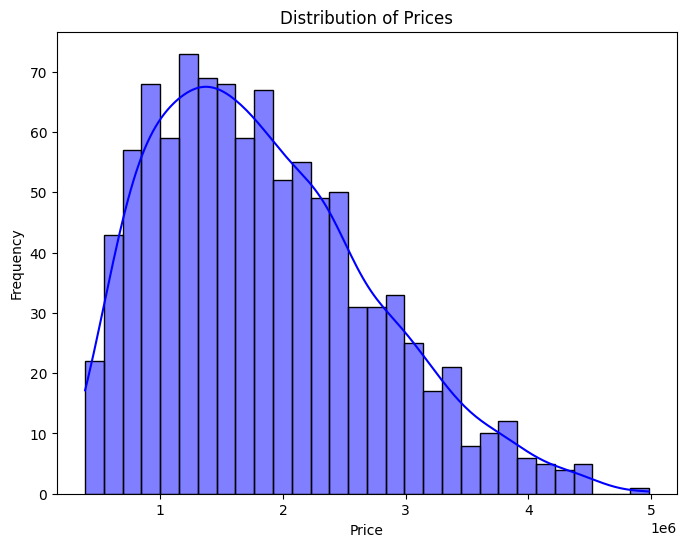

In [8]:
# Visualizing the target variable (Price)
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

 The distribution is right-skewed, **meaning most prices are concentrated at lower values** , and fewer houses have higher prices.
Peak (Mode): The most common price range appears to be between 1,000,000 and 2,000,000, as indicated by the highest bars in the histogram.

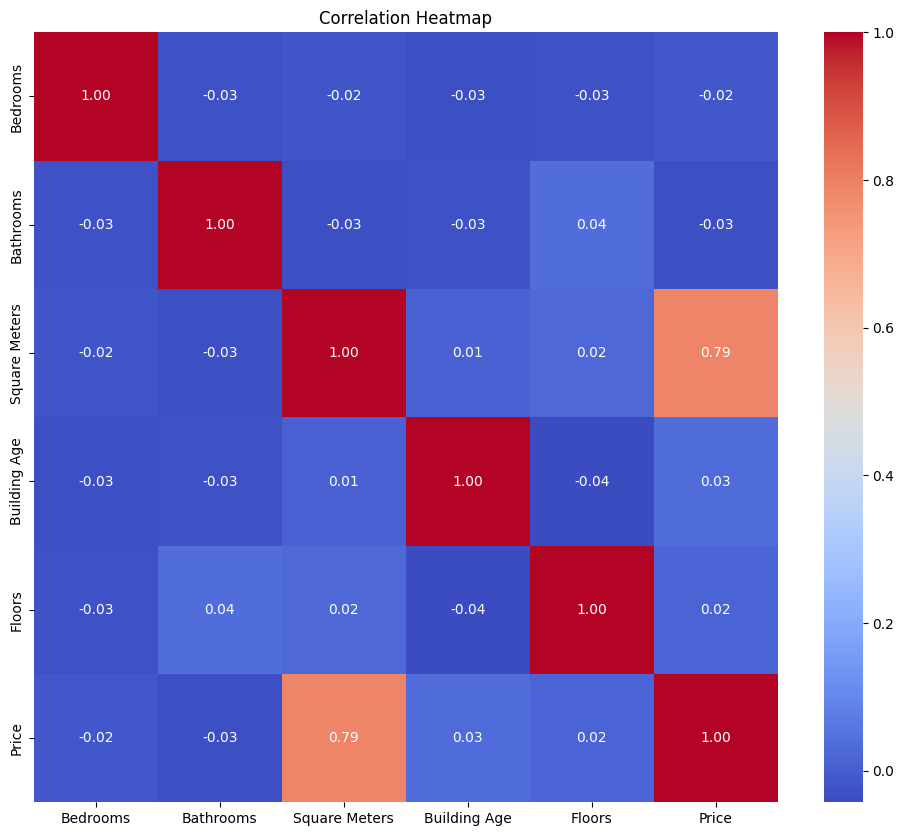

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
# Include numeric_only=True to consider only numerical columns for correlation calculation
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Selecting features for regression
# Use only numerical columns and drop those with very low correlation with the target
correlation_with_target = df.select_dtypes(include=np.number).corr()['Price'].sort_values(ascending=False)
correlation_with_target

,Price
Price,1.000000
Square Meters,0.790652
Building Age,0.031522
Floors,0.015625
Bedrooms,-0.016679
Bathrooms,-0.032632


In [11]:
# Selecting top correlated features for regression
selected_features = correlation_with_target[correlation_with_target.abs() > 0.5].index.tolist()
selected_features.remove('Price')  # Exclude the target variable
print("Selected Features:", selected_features)

Selected Features: ['Square Meters']


### Let's check which categorical variables affect house prices

In [12]:
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
categorical_vars = [col for col in categorical_vars if col != "Address"]  # Exclude 'Address'
print("Categorical Variables:")
categorical_vars


Categorical Variables:


['Neighborhood',
 'Garden',
 'Garage',
 'Property Type',
 'Heating Type',
 'Balcony',
 'Interior Style',
 'View',
 'Materials',
 'Building Status']

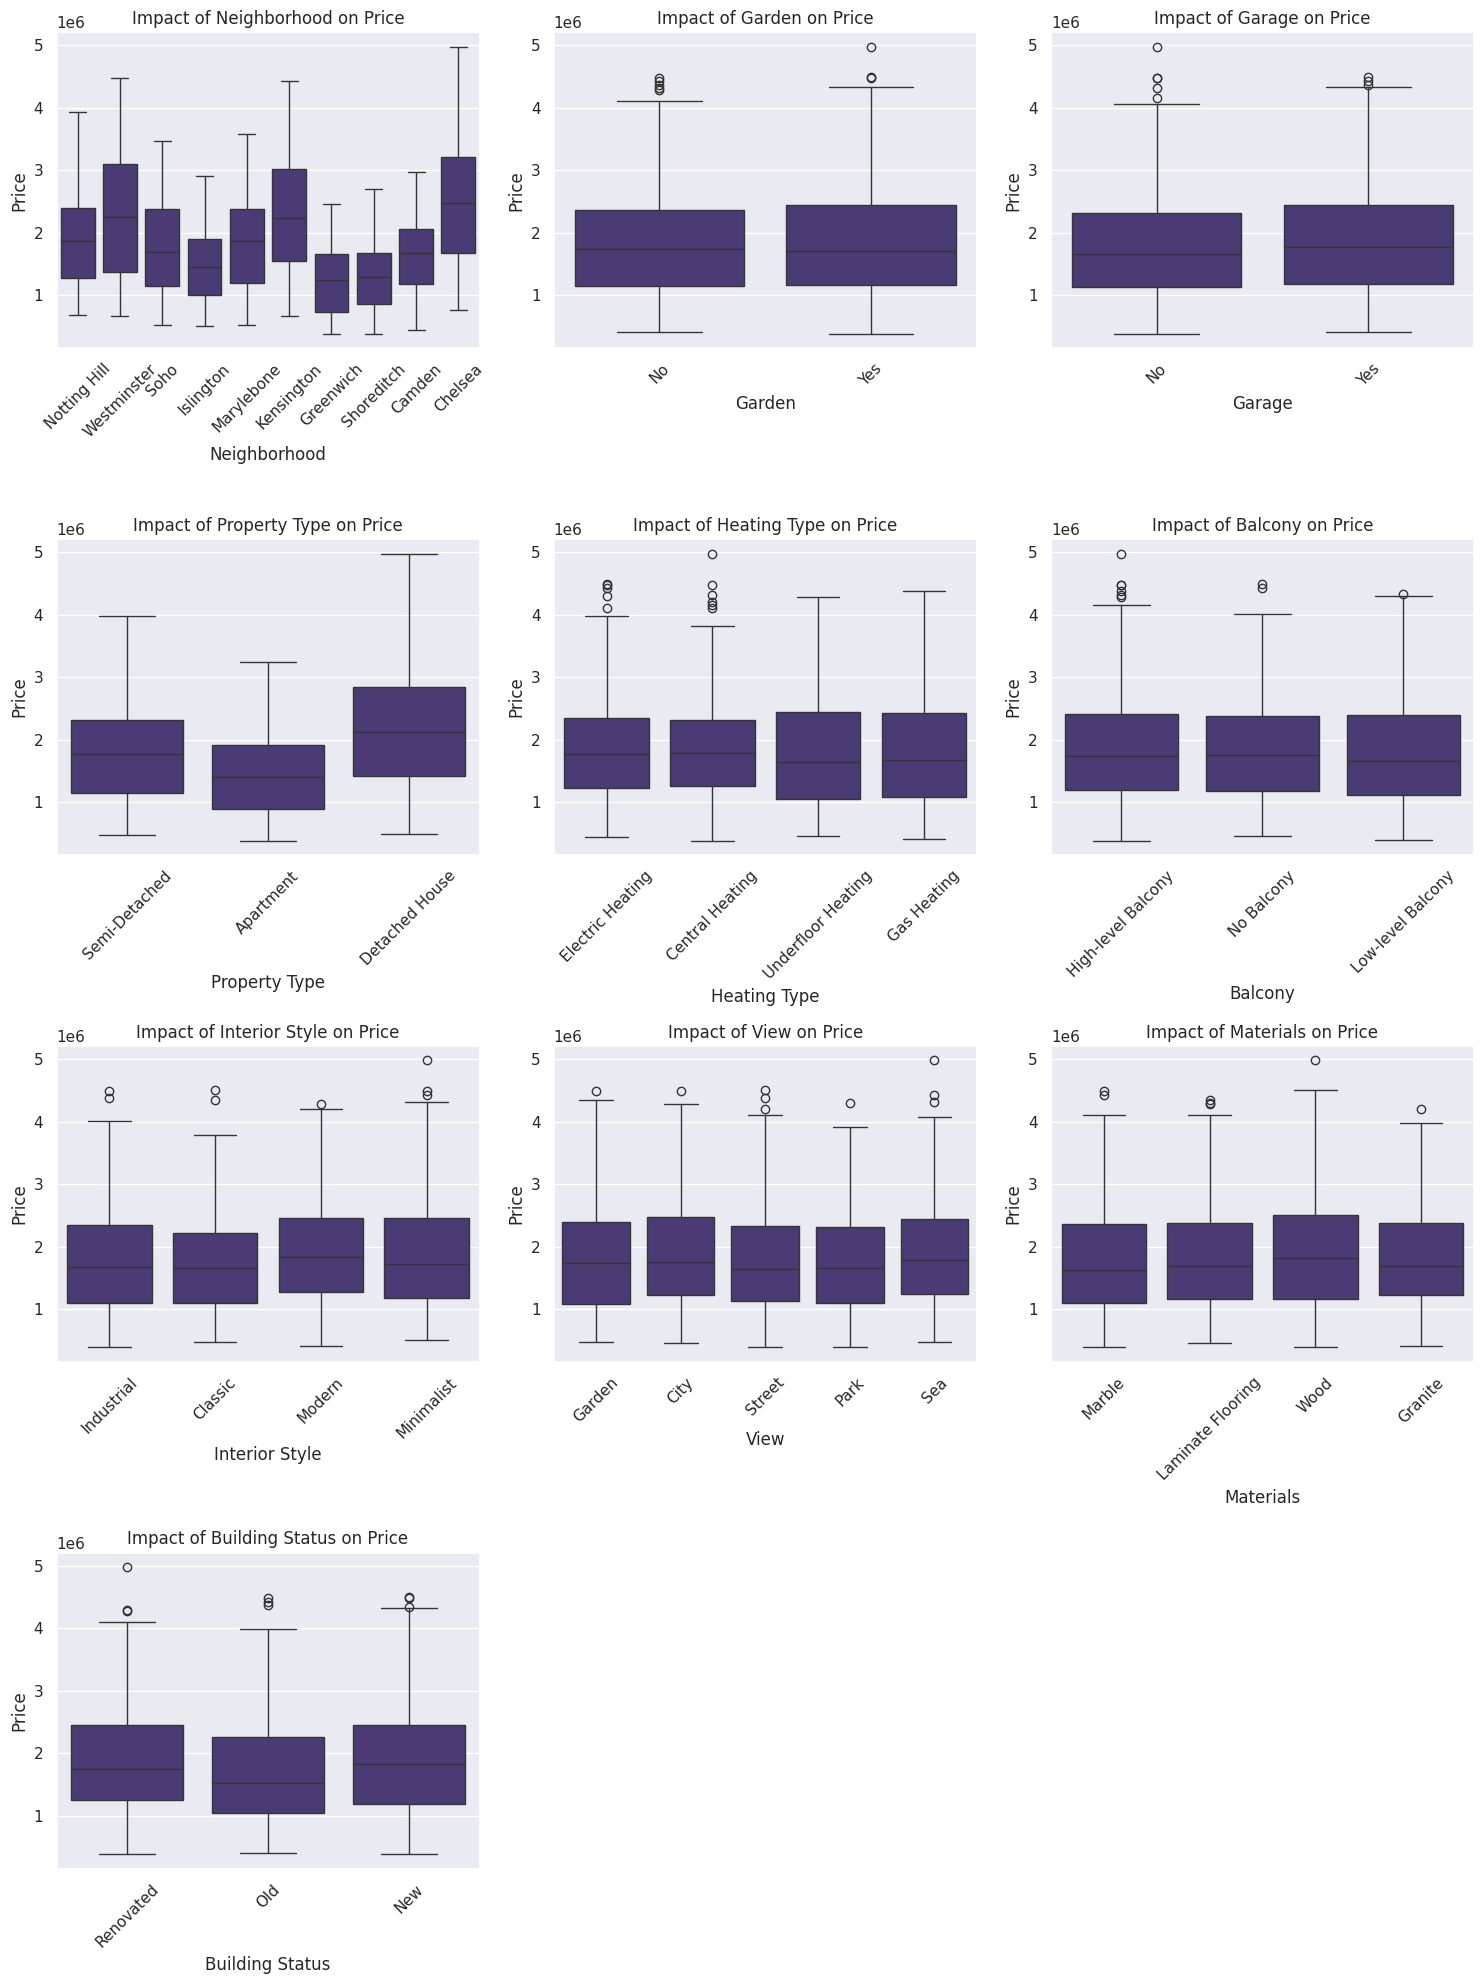

In [13]:
sns.set_theme(style="darkgrid", palette="viridis")
# Determine number of rows and columns for subplots
num_vars = len(categorical_vars)
rows = (num_vars // 3) + (num_vars % 3 > 0)  # Create enough rows to fit all variables

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable
for i, col in enumerate(categorical_vars):
    sns.boxplot(ax=axes[i], data=df, x=col, y="Price")  # Replace 'Price' with your target column
    axes[i].set_title(f"Impact of {col} on Price")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can see that **Property Type and neighborhood** have the most noticeable impact on price.
Having a garden, garage, or specific heating type does not strongly affect prices.
Also,Material and balcony type do not show a clear trend affecting house prices.

<ipython-input-14-bf58d51ece19>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Neighborhood", palette="viridis")


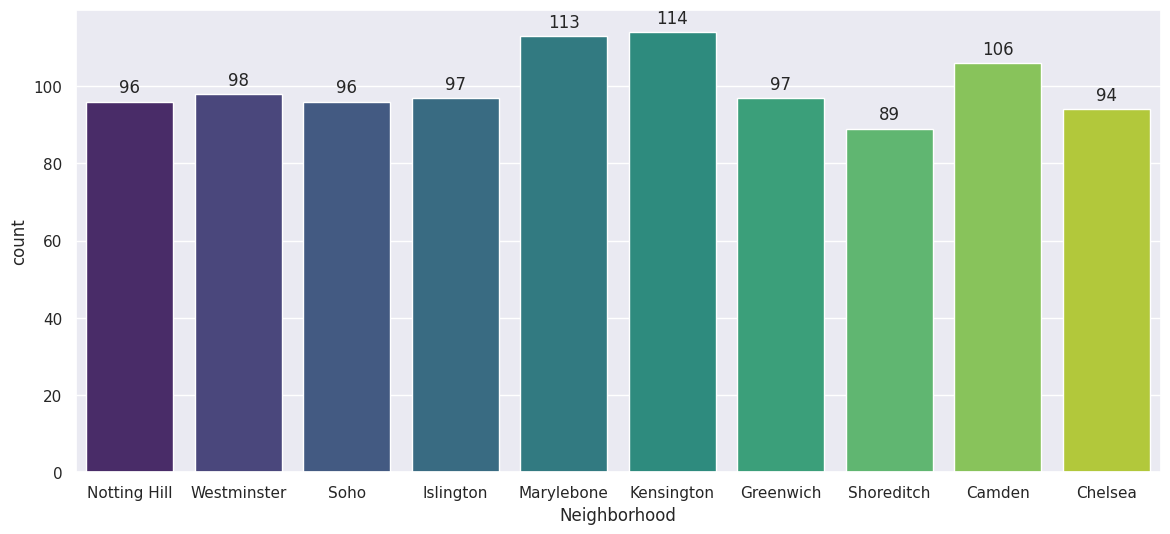

In [14]:
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x="Neighborhood", palette="viridis")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

Most houses are located in Marylebone and Kensigton

<ipython-input-15-900559608eab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Property Type", palette="viridis")


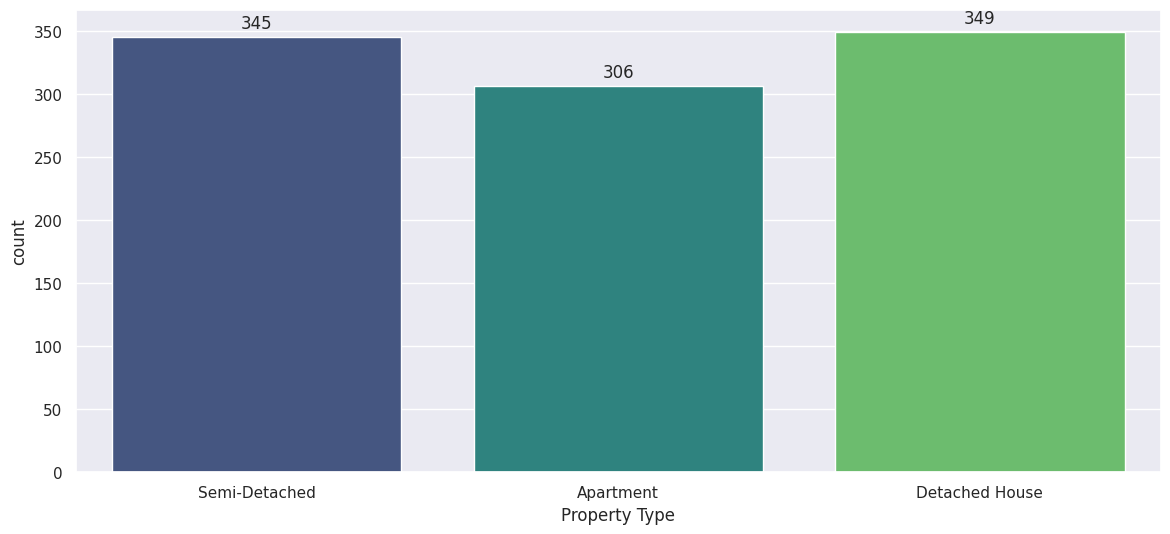

In [15]:
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x="Property Type", palette="viridis")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

Keep only the correlated variables with Price
Square Meters,Neighborhood and Property Type

**Average House Prices by neighborhood and property type**

<ipython-input-16-c00d1a625389>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(
<ipython-input-16-c00d1a625389>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(
<ipython-input-16-c00d1a625389>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(
<ipython-input-16-c00d1a625389>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


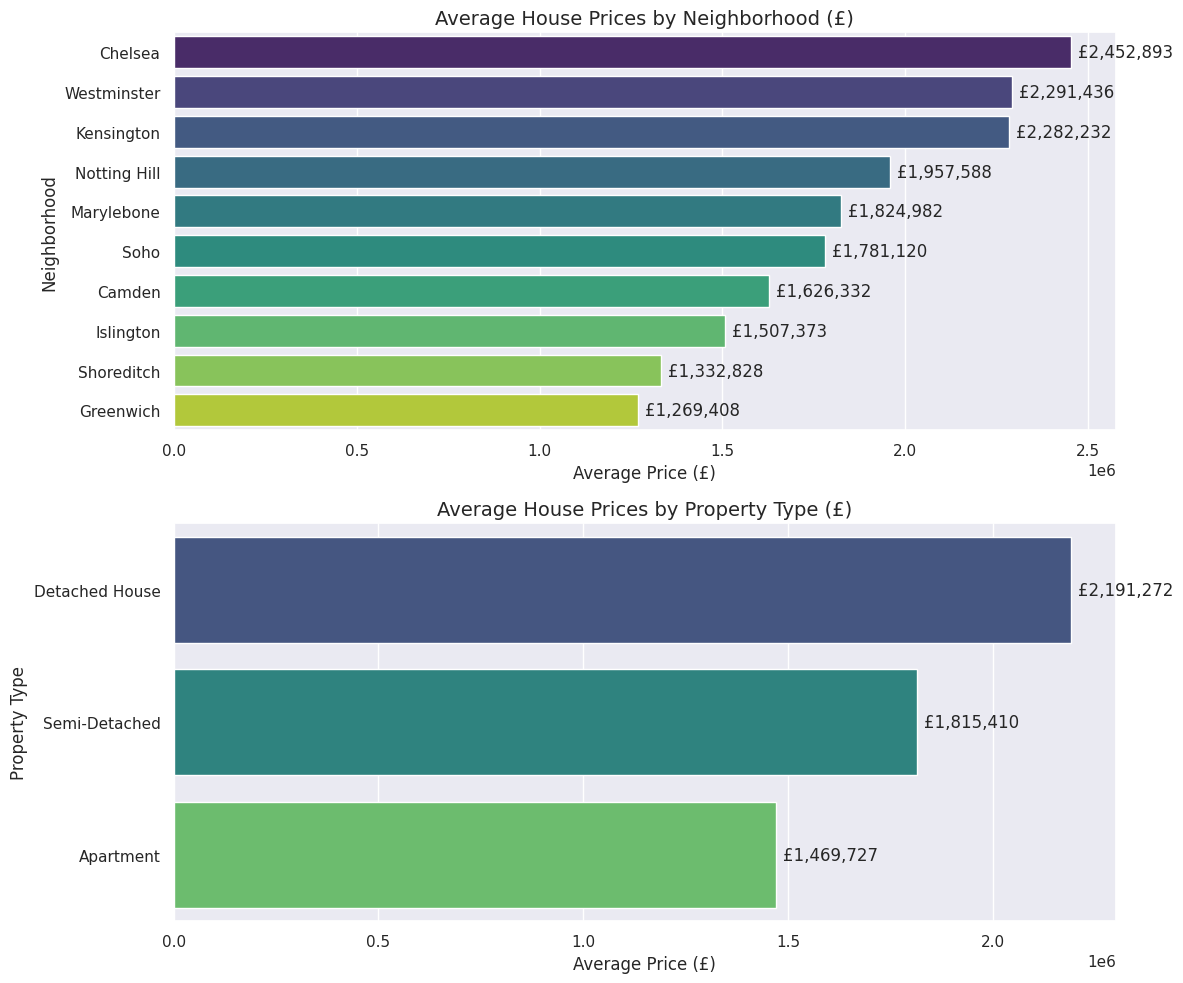

In [16]:

# Figure size
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot 1: Average House Prices by Neighborhood
ax1 = sns.barplot(
    data=df,
    y="Neighborhood",
    x="Price",
    palette="viridis",
    estimator=lambda x: sum(x) / len(x),
    order=df.groupby("Neighborhood")["Price"].mean().sort_values(ascending=False).index,
    ax=axes[0],
    ci=None
)
ax1.set_title("Average House Prices by Neighborhood (£)", fontsize=14)
ax1.set_xlabel("Average Price (£)", fontsize=12)
ax1.set_ylabel("Neighborhood", fontsize=12)

# Annotate bars with prices
for p in ax1.patches:
    ax1.annotate(f'£{int(p.get_width()):,}',
                 (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Plot 2: Average House Prices by Property Type (Sorted)
ax2 = sns.barplot(
    data=df,
    y="Property Type",
    x="Price",
    palette="viridis",
    estimator=lambda x: sum(x) / len(x),
    order=df.groupby("Property Type")["Price"].mean().sort_values(ascending=False).index,
    ax=axes[1],
    ci=None
)
ax2.set_title("Average House Prices by Property Type (£)", fontsize=14)
ax2.set_xlabel("Average Price (£)", fontsize=12)
ax2.set_ylabel("Property Type", fontsize=12)

# Annotate bars with prices
for p in ax2.patches:
    ax2.annotate(f'£{int(p.get_width()):,}',
                 (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()


## Encoding for Categorical Variables


In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[['Neighborhood', 'Property Type']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Neighborhood', 'Property Type']))

# Concatenate the encoded data with the original numeric columns
df_encoded = pd.concat([df['Square Meters'], encoded_df], axis=1)

# Convert to integers
df_encoded = df_encoded.astype(int)
df_encoded.head()

,Square Meters,Neighborhood_Chelsea,Neighborhood_Greenwich,Neighborhood_Islington,Neighborhood_Kensington,Neighborhood_Marylebone,Neighborhood_Notting Hill,Neighborhood_Shoreditch,Neighborhood_Soho,Neighborhood_Westminster,Property Type_Detached House,Property Type_Semi-Detached
0,179,0,0,0,0,0,1,0,0,0,0,1
1,123,0,0,0,0,0,0,0,0,1,0,0
2,168,0,0,0,0,0,0,0,1,0,0,1
3,237,0,0,1,0,0,0,0,0,0,0,0
4,127,0,0,0,0,1,0,0,0,0,0,1


To avoid Multicollinearity when ecoding,we drop the fisrt encoded variable making it our reference one : we dropped Property type apartement house and Neighborhood Camden

In [18]:
# the final dataframe that i will work on
df_encoded['Price'] = df['Price']
df_encoded.head()

,Square Meters,Neighborhood_Chelsea,Neighborhood_Greenwich,Neighborhood_Islington,Neighborhood_Kensington,Neighborhood_Marylebone,Neighborhood_Notting Hill,Neighborhood_Shoreditch,Neighborhood_Soho,Neighborhood_Westminster,Property Type_Detached House,Property Type_Semi-Detached,Price
0,179,0,0,0,0,0,1,0,0,0,0,1,2291200
1,123,0,0,0,0,0,0,0,0,1,0,0,1476000
2,168,0,0,0,0,0,0,0,1,0,0,1,1881600
3,237,0,0,1,0,0,0,0,0,0,0,0,1896000
4,127,0,0,0,0,1,0,0,0,0,0,1,1524000
